<a href="https://colab.research.google.com/github/JacquelineWang-0107/Yolov8_DeepLearning_BirdDetection/blob/main/11050494.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/Bird.v1i.yolov8/data.yaml epochs=1000 imgsz=256

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 83.7M/83.7M [00:00<00:00, 311MB/s]
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv

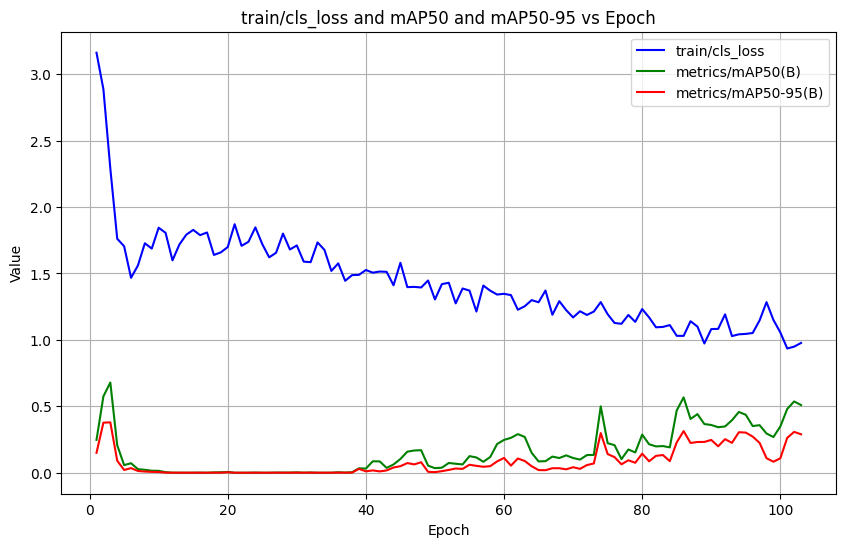

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
df = pd.read_csv('/content/runs/detect/train/results.csv')

# 提取epoch, train/cls_loss, 和 metrics/mAP50(B)
epochs = df['epoch']
cls_loss = df['train/cls_loss']
map50 = df['metrics/mAP50(B)']
map50_95 = df['metrics/mAP50-95(B)']

# 繪製圖表
plt.figure(figsize=(10, 6))

# 繪製 train/cls_loss
plt.plot(epochs, cls_loss, label='train/cls_loss', color='b')

# 繪製 mAP50(B)
plt.plot(epochs, map50, label='metrics/mAP50(B)', color='g')

plt.plot(epochs, map50_95, label='metrics/mAP50-95(B)', color='r')

# 設置標籤和標題
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('train/cls_loss and mAP50 and mAP50-95 vs Epoch')

# 顯示圖例
plt.legend()

# 顯示網格
plt.grid(True)

# 顯示圖形
plt.show()


In [5]:
import os
from google.colab import files
import shutil
from ultralytics import YOLO

# 模型路徑和圖像文件夾路徑
model_path = "/content/runs/detect/train/weights/best.pt"
pic_folder_path = "/content/drive/MyDrive/Bird.v1i.yolov8/test/images/"  #圖像文件夾路徑

# 輸出路徑訊息
print(f"Uploaded model path: {model_path}")
print(f"Uploaded pic folder path: {pic_folder_path}")

# 檢查模型和圖像路徑是否存在
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")
if not os.path.exists(pic_folder_path):
    raise FileNotFoundError(f"Image folder not found at {pic_folder_path}")

# 列出文件夾中的所有圖片文件
image_files = [f for f in os.listdir(pic_folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the specified folder.")
print(f"Found {len(image_files)} image(s) to process.")

# 載入模型
model = YOLO(model_path)

# 設置 YOLOv8 輸出文件夾路徑
output_dir = "/content/runs/detect/predict/"
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # 清理舊的預測文件夾

# 對每張圖像進行檢測並保存標籤
for image_file in image_files:
    image_path = os.path.join(pic_folder_path, image_file)
    print(f"Processing {image_path}...")
    results = model.predict(source=image_path, save=True, save_txt=True)

# 將檢測結果壓縮為 ZIP 文件
output_zip = "/content/detect_results.zip"
shutil.make_archive(output_zip.replace(".zip", ""), "zip", output_dir)
print(f"Results saved and compressed at {output_zip}")

# 下載 ZIP 文件
files.download(output_zip)


Uploaded model path: /content/runs/detect/train/weights/best.pt
Uploaded pic folder path: /content/drive/MyDrive/Bird.v1i.yolov8/test/images/
Found 9 image(s) to process.
Processing /content/drive/MyDrive/Bird.v1i.yolov8/test/images/1151ebb9d00242ac110003_jpg.rf.676d6f3d8e65730691eb00b201ecbc30.jpg...

image 1/1 /content/drive/MyDrive/Bird.v1i.yolov8/test/images/1151ebb9d00242ac110003_jpg.rf.676d6f3d8e65730691eb00b201ecbc30.jpg: 256x256 1 empty_cage, 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 238.5ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Processing /content/drive/MyDrive/Bird.v1i.yolov8/test/images/1526102029_10834238_jpg.rf.26a6da3d1cbe2e3675922bea5c87a52c.jpg...

image 1/1 /content/drive/MyDrive/Bird.v1i.yolov8/test/images/1526102029_10834238_jpg.rf.26a6da3d1cbe2e3675922bea5c87a52c.jpg: 256x256 1 empty_cage, 18.8ms
Speed: 1.4ms preprocess, 18.8ms inference, 2.3ms postprocess per image at

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import os

# 定義路徑
true_label_dir = "/content/drive/MyDrive/Bird.v1i.yolov8/test/labels/"
pred_label_dir = "/content/runs/detect/predict/labels/"

# 獲取兩個目錄中所有相同名稱的文件
true_files = set(os.listdir(true_label_dir))
pred_files = set(os.listdir(pred_label_dir))
common_files = true_files.intersection(pred_files)  # 獲取同名文件

print(f"Found {len(common_files)} common label files.")

# 定義函數：解析標註文件內容為絕對座標
def parse_labels(file_path):
    boxes = []
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])
                # 轉換為絕對座標 x_min, y_min, x_max, y_max
                x_min = x_center - width / 2
                y_min = y_center - height / 2
                x_max = x_center + width / 2
                y_max = y_center + height / 2
                boxes.append((class_id, x_min, y_min, x_max, y_max))
    return boxes

# 定義函數：計算兩個框的 IOU
def calculate_iou(box1, box2):
    x_min1, y_min1, x_max1, y_max1 = box1
    x_min2, y_min2, x_max2, y_max2 = box2

    # 計算交集座標
    inter_x_min = max(x_min1, x_min2)
    inter_y_min = max(y_min1, y_min2)
    inter_x_max = min(x_max1, x_max2)
    inter_y_max = min(y_max1, y_max2)

    # 計算交集面積
    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)

    # 計算每個框的面積
    area1 = (x_max1 - x_min1) * (y_max1 - y_min1)
    area2 = (x_max2 - x_min2) * (y_max2 - y_min2)

    # 計算並集面積
    union_area = area1 + area2 - inter_area

    # 計算 IOU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# 遍歷每個文件，計算 IOU
for file_name in common_files:
    true_file_path = os.path.join(true_label_dir, file_name)
    pred_file_path = os.path.join(pred_label_dir, file_name)

    true_boxes = parse_labels(true_file_path)
    pred_boxes = parse_labels(pred_file_path)

    print(f"File: {file_name}")
    for true_box in true_boxes:
        true_class, *true_coords = true_box
        for pred_box in pred_boxes:
            pred_class, *pred_coords = pred_box
            if true_class == pred_class:  # 仅计算同类别的框
                iou = calculate_iou(true_coords, pred_coords)
                print(f"  True Class: {true_class}, True Box: {true_coords}")
                print(f"  Pred Class: {pred_class}, Pred Box: {pred_coords}")
                print(f"  IOU: {iou:.4f}")


Found 8 common label files.
File: w360_jpg.rf.395fe9ad32e156db14e2fadfeded0d3d.txt
  True Class: 1, True Box: [0.28867187499999997, 0.11367187499999998, 0.708203125, 0.883203125]
  Pred Class: 1, Pred Box: [0.2851675, 0.11210799999999999, 0.7245405, 0.95636]
  IOU: 0.8703
File: images_jpg.rf.39f77025c2930344d040a3157c4361df.txt
  True Class: 1, True Box: [0.16445312500000003, 0.20937499999999998, 0.830859375, 0.946875]
  Pred Class: 1, Pred Box: [0.15172049999999998, 0.20083399999999996, 0.8410655, 1.0]
  IOU: 0.8921
File: 2YURcoGWWXwyIDLEulwL8B_jpg.rf.c606b76632cab93c8d3040d3b1f86821.txt
  True Class: 0, True Box: [0.310546875, 0.26835937499999996, 0.664453125, 0.861328125]
  Pred Class: 0, Pred Box: [0.001898999999999984, 0.5343384999999999, 0.549911, 0.9993415]
  IOU: 0.2026
  True Class: 0, True Box: [0.310546875, 0.26835937499999996, 0.664453125, 0.861328125]
  Pred Class: 0, Pred Box: [0.295507, 0.2495965, 0.6632450000000001, 0.6765335]
  IOU: 0.6459
  True Class: 0, True Box: [0